In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
sns.set()

# Use inline so our visualizations display in notebook
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Import our Random Forest
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz

In [4]:
df = pd.read_csv('/content/drive/MyDrive/SQLproject/CombinedESRBdata.csv')
df.iloc[0:10]

,game_title,esrb_rating,content_descriptors,interactive_elements,content_summary,platform,release_date,updated,developers,genres,...,Gaming,Realistic Violence,Realistic Blood,Suitable for Mature Users,Gambling Themes,Realistic Blood and Gore,Sexual Violence,Mild Realistic Violence,Suitable for All Users,Mild Animated Blood
0,"Ed, Edd n Eddy: Scam of the Century",E,"Crude Humor,Mild Cartoon Violence",No Interactive Elements,No Rating Summary,Nintendo DS,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Napoleon Dynamite,E10+,"Cartoon Violence,Mild Language",No Interactive Elements,No Rating Summary,Nintendo DS,2007-10-31,2019-01-09T12:41:06,7 Studios,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rail Simulator,E,No Descriptors,No Interactive Elements,No Rating Summary,Windows PC,2007-10-12,2019-01-09T12:41:06,Kuju Entertainment,Simulation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NES Open Tournament Golf,E,No Descriptors,No Interactive Elements,No Rating Summary,Wii,1987-06-14,2019-07-12T12:10:28,Nintendo,Sports,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ultimate Duck Hunting,T,Mild Violence,No Interactive Elements,No Rating Summary,Wii,2009-05-26,2019-01-09T12:41:06,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Fortnite - Anime Legends,T,Violence,"Users Interact, In-Game Purchases.",This is an action game in which players build ...,PlayStation 4,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Demoniaca: Everlasting Night,M,"Blood and Gore,Language,Nudity,Violence",No Interactive Elements,No Rating Summary,Nintendo Switch,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Ryan’s Rescue Squad,E,Mild Cartoon Violence,No Interactive Elements,This is a side-scrolling platformer in which p...,Windows PC,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,The Sims™ 4 - Wedding Stories,T,"Crude Humor,Sexual Themes,Violence",Online Interactions Not Rated by the ESRB.,No Rating Summary,Windows PC,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,The400 Mini,E,Mild Fantasy Violence,No Interactive Elements,This is a collection of classic Atari 400 game...,The400 Mini,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.set_option('display.max_rows', None)
df['platform'].value_counts()

,count
platform,
Windows PC,10094
PlayStation 4,4785
Xbox One,2971
PlayStation 3,2743
Nintendo Switch,2353
Xbox 360,2237
Wii,2112
Nintendo DS,1917
macOS,1741


There is a specific word for data that is categorical but has a hierarchy to it

In [ ]:
df.head()

,game_title,esrb_rating,content_descriptors,interactive_elements,content_summary,platform,release_date,updated,developers,genres,...,Realistic Violence,Realistic Blood,Suitable for Mature Users,Gambling Themes,Realistic Blood and Gore,Sexual Violence,Mild Realistic Violence,Suitable for All Users,Mild Animated Blood,esrb_encoded
0,"Ed, Edd n Eddy: Scam of the Century",E,"Crude Humor,Mild Cartoon Violence",No Interactive Elements,No Rating Summary,Nintendo DS,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Napoleon Dynamite,E10+,"Cartoon Violence,Mild Language",No Interactive Elements,No Rating Summary,Nintendo DS,2007-10-31,2019-01-09T12:41:06,7 Studios,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Rail Simulator,E,No Descriptors,No Interactive Elements,No Rating Summary,Windows PC,2007-10-12,2019-01-09T12:41:06,Kuju Entertainment,Simulation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,NES Open Tournament Golf,E,No Descriptors,No Interactive Elements,No Rating Summary,Wii,1987-06-14,2019-07-12T12:10:28,Nintendo,Sports,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Ultimate Duck Hunting,T,Mild Violence,No Interactive Elements,No Rating Summary,Wii,2009-05-26,2019-01-09T12:41:06,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45891 entries, 0 to 45890
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   game_title                     45891 non-null  object 
 1   esrb_rating                    45891 non-null  object 
 2   content_descriptors            45891 non-null  object 
 3   interactive_elements           45891 non-null  object 
 4   content_summary                45889 non-null  object 
 5   platform                       45891 non-null  object 
 6   release_date                   17807 non-null  object 
 7   updated                        18302 non-null  object 
 8   developers                     16753 non-null  object 
 9   genres                         15497 non-null  object 
 10  release_year                   45891 non-null  int64  
 11  publisher                      6572 non-null   object 
 12  na_sales                       6578 non-null  

In [ ]:
#df["esrb_encoded"] = df.esrb_rating.astype(float)

df["esrb_encoded"] = pd.to_numeric(df["esrb_encoded"])

# the second method worked but not the first

In [ ]:
df.columns


Index(['game_title', 'esrb_rating', 'content_descriptors',
       'interactive_elements', 'content_summary', 'platform', 'release_date',
       'updated', 'developers', 'genres', 'release_year', 'publisher',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'Number of Descriptors', 'Crude Humor', 'Mild Cartoon Violence',
       'Cartoon Violence', 'Mild Language', 'Mild Violence', 'Violence',
       'Blood and Gore', 'Language', 'Nudity', 'Sexual Themes',
       'Mild Fantasy Violence', 'Alcohol Reference', 'Mild Suggestive Themes',
       'Simulated Gambling', 'Fantasy Violence', 'Mild Blood',
       'Use of Alcohol', 'Use of Tobacco', 'Drug Reference', 'Strong Language',
       'Suggestive Themes', 'Blood', 'Partial Nudity', 'Tobacco Reference',
       'Comic Mischief', 'Animated Blood', 'Intense Violence',
       'Alcohol and Tobacco Reference', 'Violent References',
       'Strong Sexual Content', 'Use of Alcohol and Tobacco', 'Use of Drugs',
       '

Needed to change the encoded type to a number so we can get correlations

In [ ]:
df['game_title'].dtype

dtype('O')

In [ ]:
numeric = df.copy()
for i in numeric.columns:
  try:
    # print(numeric[i], numeric[i].dtype)
    if numeric[i].dtype == "object":
      # print("y", numeric[i].dtype)
      numeric = numeric.drop(columns=i)

  except Exception as e:
    # print(e)
    continue

plt.figure(figsize=(100, 100))

sns.heatmap(numeric.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

Output hidden; open in https://colab.research.google.com to view.

We can see that blood, strong laguage and blood and gore are positively correlated with a higher esrb rating

Also the new feature I added is alo highly correlated with a higher rating

We can also see that mild fantasy violence is correlated with a lower esrb rating

Lots of visualisation can be done by making slices of the different ratings using groupby and seeing what categories are most common in the different ratings

Might want to remove no_descriptors from the column names

In [ ]:
df.drop(columns=["ReleaseYear"], inplace=True)

In [ ]:
df.columns

Index(['game_title', 'esrb_rating', 'content_descriptors',
       'interactive_elements', 'content_summary', 'platform', 'release_date',
       'updated', 'developers', 'genres', 'release_year', 'publisher',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'Number of Descriptors', 'Crude Humor', 'Mild Cartoon Violence',
       'Cartoon Violence', 'Mild Language', 'Mild Violence', 'Violence',
       'Blood and Gore', 'Language', 'Nudity', 'Sexual Themes',
       'Mild Fantasy Violence', 'Alcohol Reference', 'Mild Suggestive Themes',
       'Simulated Gambling', 'Fantasy Violence', 'Mild Blood',
       'Use of Alcohol', 'Use of Tobacco', 'Drug Reference', 'Strong Language',
       'Suggestive Themes', 'Blood', 'Partial Nudity', 'Tobacco Reference',
       'Comic Mischief', 'Animated Blood', 'Intense Violence',
       'Alcohol and Tobacco Reference', 'Violent References',
       'Strong Sexual Content', 'Use of Alcohol and Tobacco', 'Use of Drugs',
       '

In [ ]:
selected_features = [ 'release_year',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'Number of Descriptors', 'Crude Humor', 'Mild Cartoon Violence',
       'Cartoon Violence', 'Mild Language', 'Mild Violence', 'Violence',
       'Blood and Gore', 'Language', 'Nudity', 'Sexual Themes',
       'Mild Fantasy Violence', 'Alcohol Reference', 'Mild Suggestive Themes',
       'Simulated Gambling', 'Fantasy Violence', 'Mild Blood',
       'Use of Alcohol', 'Use of Tobacco', 'Drug Reference', 'Strong Language',
       'Suggestive Themes', 'Blood', 'Partial Nudity', 'Tobacco Reference',
       'Comic Mischief', 'Animated Blood', 'Intense Violence',
       'Alcohol and Tobacco Reference', 'Violent References',
       'Strong Sexual Content', 'Use of Alcohol and Tobacco', 'Use of Drugs',
       'Mild Lyrics', 'Lyrics', 'Use of Drugs and Alcohol',
       'Animated Violence', 'Mild Sexual Themes', 'Sexual Content',
       'Drug and Alcohol Reference', 'Strong Lyrics', 'Mature Humor',
       'Edutainment', 'Gambling', 'Animated Blood and Gore', 'Informational',
       'Mature Sexual Themes', 'Mild Animated Violence', 'Gaming',
       'Realistic Violence', 'Realistic Blood', 'Suitable for Mature Users',
       'Gambling Themes', 'Realistic Blood and Gore', 'Sexual Violence',
       'Mild Realistic Violence', 'Suitable for All Users',
       'Mild Animated Blood']


Using just the

Lets try using the Release date in three ways:
<br>
1)imputed missings as 0
<br>
2)dropped missing
<br>
3)no release date

In [ ]:

dfs = df[selected_features].copy()
dfs = dfs.drop(columns=['na_sales','eu_sales','jp_sales','other_sales','global_sales'])

Lets try with imputed dated

In [ ]:
dfs

,release_year,Number of Descriptors,Crude Humor,Mild Cartoon Violence,Cartoon Violence,Mild Language,Mild Violence,Violence,Blood and Gore,Language,...,Realistic Violence,Realistic Blood,Suitable for Mature Users,Gambling Themes,Realistic Blood and Gore,Sexual Violence,Mild Realistic Violence,Suitable for All Users,Mild Animated Blood,esrb_encoded
0,2008,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2007,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2007,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1987,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2009,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45886,2022,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
45887,2014,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
45888,2013,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
45889,2014,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [ ]:
X = dfs.drop(columns=["esrb_rating"])

y = dfs["esrb_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

Lenght of our Training data: 36712 
Length of our Testing data: 9179
              precision    recall  f1-score   support

          AO       0.75      0.50      0.60         6
           E       0.92      0.93      0.92      3927
        E10+       0.77      0.78      0.77      1364
           M       0.93      0.90      0.92      1299
           T       0.84      0.83      0.83      2583

    accuracy                           0.88      9179
   macro avg       0.84      0.79      0.81      9179
weighted avg       0.88      0.88      0.88      9179



 precision    recall  f1-score   support

          AO       0.50      0.17      0.25         6
           E       0.92      0.93      0.93      3927
        E10+       0.78      0.78      0.78      1364
           M       0.94      0.90      0.92      1299
           T       0.84      0.85      0.84      2583

    accuracy                           0.88      9179
   macro avg       0.80      0.73      0.74      9179
weighted avg       0.88      0.88      0.88      9179

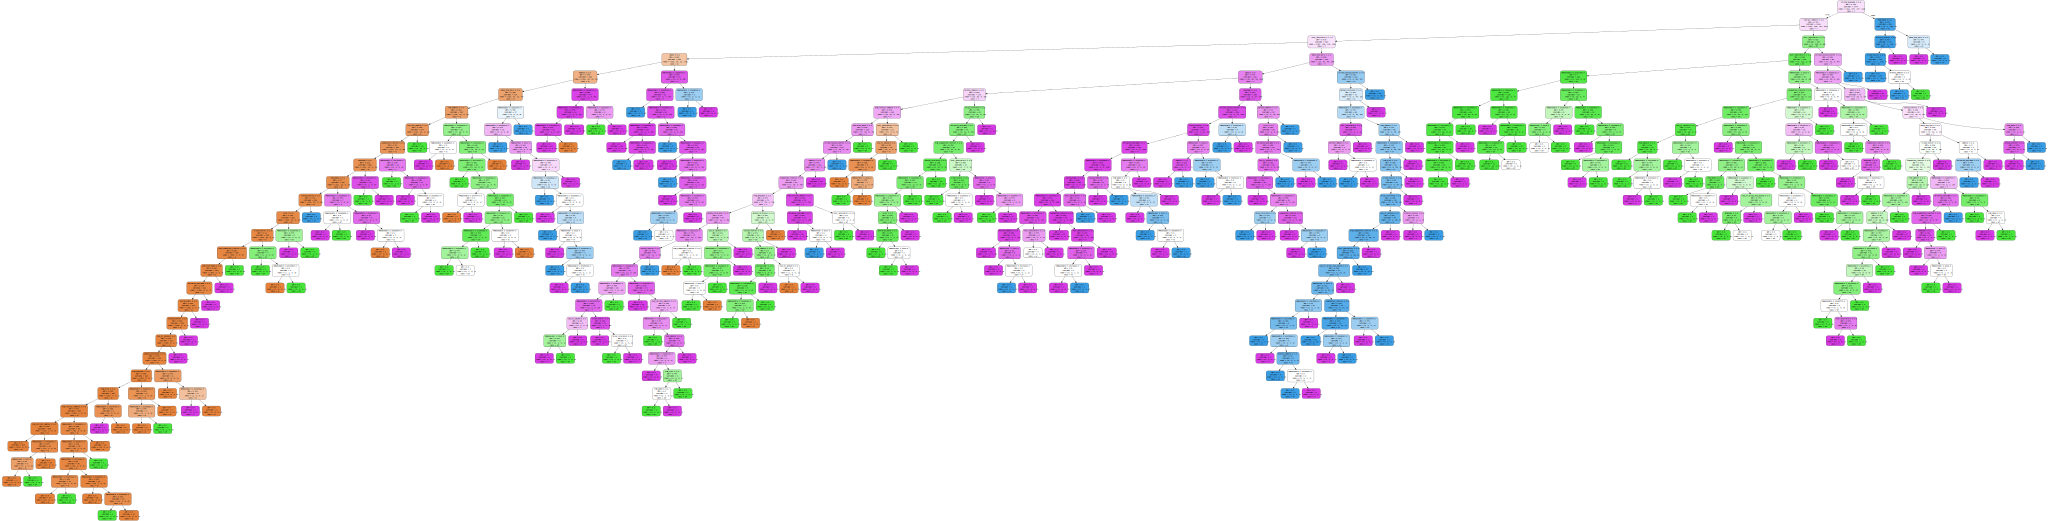

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)

graph

Strong Language is the first split

Could try tuning the parameters

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
31,0.157970,num_descriptors
29,0.151132,ReleaseDate
30,0.130425,strong_language
7,0.119362,fantasy_violence
2,0.077129,blood
3,0.061650,blood_and_gore
28,0.053224,violence
25,0.023561,suggestive_themes
18,0.022299,mild_violence
9,0.018195,language


In [ ]:
selected_features2 = dfs.drop(columns=["esrb_rating"]).columns
X = dfs[selected_features2]

y = dfs["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.879721


In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          AO       0.50      0.17      0.25         6
           E       0.92      0.93      0.93      3927
        E10+       0.78      0.78      0.78      1364
           M       0.94      0.90      0.92      1299
           T       0.84      0.85      0.84      2583

    accuracy                           0.88      9179
   macro avg       0.80      0.73      0.74      9179
weighted avg       0.88      0.88      0.88      9179



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[   1    0    0    4    1]
 [   1 3644  134    1  147]
 [   0  139 1068    0  157]
 [   0    4    1 1172  122]
 [   0  155  163   74 2191]]


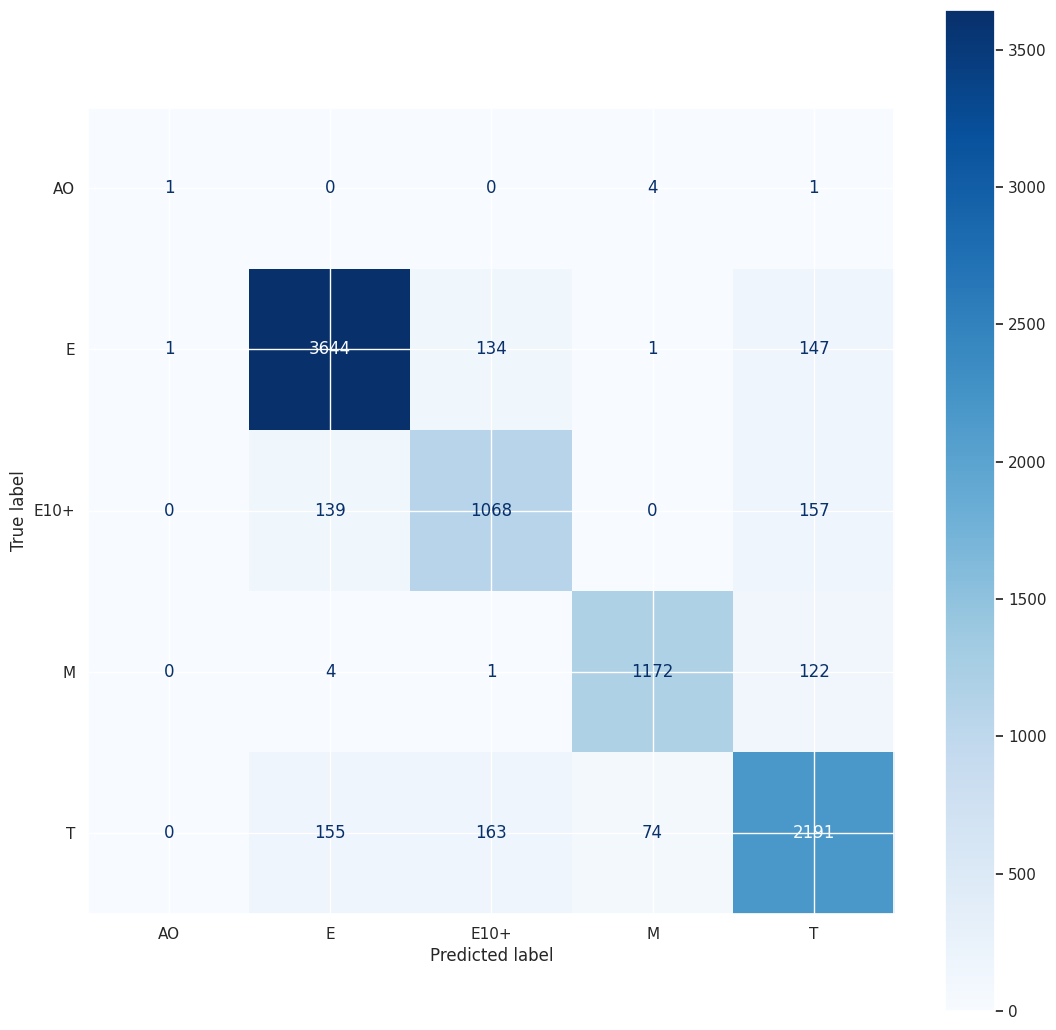

In [ ]:
fig, ax = plt.subplots(figsize=(13,13))

metrics.ConfusionMatrixDisplay.from_estimator(estimator=model,
                              X=X_test,
                              y=y_test,
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features2 }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.194687,Number of Descriptors
7,0.109690,Violence
0,0.108010,release_year
21,0.082546,Strong Language
16,0.079122,Fantasy Violence
8,0.055139,Blood and Gore
23,0.050091,Blood
28,0.039349,Intense Violence
22,0.026163,Suggestive Themes
5,0.025012,Mild Language


Not much improvement from the regualr decision tree

Maybe would be better with tuning

In [ ]:
param_grid = {
    'n_estimators': [ 50, 100, 150, 300, 600],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 25, 35,45,55],
    'max_leaf_nodes': [3, 6, 9, 12],
}


In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=25, max_leaf_nodes=12, n_estimators=600)


In [ ]:
model_grid = RandomForestClassifier(max_depth=25,
                                    max_features=None,
                                    max_leaf_nodes=15,
                                    n_estimators=300)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred_grid))


              precision    recall  f1-score   support

          AO       0.33      0.50      0.40         2
           E       0.93      0.93      0.93      2918
        E10+       0.78      0.78      0.78      1041
           M       0.90      0.93      0.92       937
           T       0.85      0.83      0.84      1986

    accuracy                           0.88      6884
   macro avg       0.76      0.80      0.77      6884
weighted avg       0.88      0.88      0.88      6884

[[   1    0    0    2    0]
 [   1 2700   98    0  115]
 [   0  105  816    0  124]
 [   0    4    1  874   90]
 [   0  109  126   61 1657]]


In [ ]:
model_grid = RandomForestClassifier(max_depth=25,
                                    max_features=None,
                                    max_leaf_nodes=12,
                                    n_estimators=600)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred_grid))

              precision    recall  f1-score   support

          AO       0.33      0.50      0.40         2
           E       0.93      0.93      0.93      2918
        E10+       0.78      0.78      0.78      1041
           M       0.90      0.93      0.92       937
           T       0.85      0.83      0.84      1986

    accuracy                           0.88      6884
   macro avg       0.76      0.80      0.77      6884
weighted avg       0.88      0.88      0.88      6884

[[   1    0    0    2    0]
 [   1 2700   98    0  115]
 [   0  105  816    0  124]
 [   0    4    1  874   90]
 [   0  109  126   61 1657]]


In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features2 }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
1,0.194687,Number of Descriptors
7,0.109690,Violence
0,0.108010,release_year
21,0.082546,Strong Language
16,0.079122,Fantasy Violence
8,0.055139,Blood and Gore
23,0.050091,Blood
28,0.039349,Intense Violence
22,0.026163,Suggestive Themes
5,0.025012,Mild Language


In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=12,
                       n_estimators=50)


In [ ]:
selected_features2 = dfs.drop(columns=["esrb_rating"]).columns
X = dfs[selected_features2]

y = dfs["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [ ]:
X = df[selected_features]

y = df["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier().fit(X_train, y_train)


y_pred = clf.predict(X = X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

clf.score(X, y)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3933
           1       0.73      0.72      0.72      1376
           2       0.82      0.80      0.81      2649
           3       0.87      0.93      0.90      1219
           4       0.00      0.00      0.00         2

    accuracy                           0.85      9179
   macro avg       0.67      0.67      0.67      9179
weighted avg       0.85      0.85      0.85      9179

[[3608  160  157    0    2]
 [ 165  989  210    0    0]
 [ 153  227 2119   84    0]
 [   7    0  161 1131    0]
 [   0    0    2    4    0]]


0.8602340328168921

We got a bit more data, might as well train the model on it, pickle it, add the updated dataset to kaggle, as well as try to get a new rawdataset IN SQL by adding the

In [ ]:
import xgboost as xgb

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#Creating an XGBoost classifier
model = xgb.XGBClassifier()
#Training the model on the training data
model.fit(X_train, y_train)
#Making predictions on the test set
predictions = model.predict(X_test)
#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=encode))


Accuracy: 0.8688310273450267

Classification Report:
              precision    recall  f1-score   support

           E       0.92      0.93      0.92      3927
        E10+       0.75      0.75      0.75      1364
           T       0.83      0.82      0.83      2583
           M       0.93      0.89      0.91      1299
          AO       0.67      0.33      0.44         6

    accuracy                           0.87      9179
   macro avg       0.82      0.75      0.77      9179
weighted avg       0.87      0.87      0.87      9179



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
for i in learning_rate:
  clf = GradientBoostingClassifier(max_depth=25,
                                      max_features=None,
                                      max_leaf_nodes=12,
                                      n_estimators=600,
                                  learning_rate=i)

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X = X_test)
  accuracy = accuracy_score(y_test, predictions)
  print(i, "Accuracy:", accuracy)


0.0001 Accuracy: 0.8688310273450267
0.001 Accuracy: 0.8688310273450267
0.01 Accuracy: 0.8688310273450267
0.1 Accuracy: 0.8688310273450267
0.2 Accuracy: 0.8688310273450267
0.3 Accuracy: 0.8688310273450267


In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=600)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AO       0.00      0.00      0.00         0
           E       0.92      0.89      0.91      4057
        E10+       0.68      0.68      0.68      1378
           M       0.82      0.89      0.85      1189
           T       0.76      0.77      0.76      2555

    accuracy                           0.82      9179
   macro avg       0.64      0.65      0.64      9179
weighted avg       0.83      0.82      0.83      9179

[[   0    2    0    3    1]
 [   0 3614  166    0  147]
 [   0  202  934    0  228]
 [   0   16    1 1063  219]
 [   0  223  277  123 1960]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

          AO       0.67      0.00      0.00      3341
           E       0.06      0.70      0.11       340
        E10+       0.97      0.35      0.51      3773
           M       0.61      0.73      0.66      1087
           T       0.24      0.96      0.38       638

    accuracy                           0.32      9179
   macro avg       0.51      0.55      0.33      9179
weighted avg       0.73      0.32      0.32      9179



In [ ]:
dtc = DecisionTreeClassifier()
y_pred = dtc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          AO       0.17      0.33      0.22         3
           E       0.93      0.92      0.93      3983
        E10+       0.78      0.77      0.77      1375
           M       0.91      0.93      0.92      1267
           T       0.83      0.84      0.83      2551

    accuracy                           0.88      9179
   macro avg       0.72      0.76      0.73      9179
weighted avg       0.88      0.88      0.88      9179



In [7]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
rfc.get_params()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3928
           1       0.78      0.78      0.78      1362
           2       0.85      0.83      0.84      2639
           3       0.90      0.94      0.92      1248
           4       0.17      0.50      0.25         2

    accuracy                           0.88      9179
   macro avg       0.72      0.80      0.74      9179
weighted avg       0.88      0.88      0.88      9179

[[3638  134  153    1    1]
 [ 139 1064  161    0    0]
 [ 147  163 2199   74    0]
 [   4    1  125 1169    0]
 [   0    0    1    4    1]]


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SQLproject/CombinedESRBdata.csv')

In [6]:
encode = {'E' : 0,
          'E10+': 1,
          'T' : 2,
          'M' : 3,
          'AO':4}
df["esrb_encoded"] = df["esrb_rating"].map(encode)

In [7]:
selected_features = [ 'release_year',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'Number of Descriptors', 'Crude Humor', 'Mild Cartoon Violence',
       'Cartoon Violence', 'Mild Language', 'Mild Violence', 'Violence',
       'Blood and Gore', 'Language', 'Nudity', 'Sexual Themes',
       'Mild Fantasy Violence', 'Alcohol Reference', 'Mild Suggestive Themes',
       'Simulated Gambling', 'Fantasy Violence', 'Mild Blood',
       'Use of Alcohol', 'Use of Tobacco', 'Drug Reference', 'Strong Language',
       'Suggestive Themes', 'Blood', 'Partial Nudity', 'Tobacco Reference',
       'Comic Mischief', 'Animated Blood', 'Intense Violence',
       'Alcohol and Tobacco Reference', 'Violent References',
       'Strong Sexual Content', 'Use of Alcohol and Tobacco', 'Use of Drugs',
       'Mild Lyrics', 'Lyrics', 'Use of Drugs and Alcohol',
       'Animated Violence', 'Mild Sexual Themes', 'Sexual Content',
       'Drug and Alcohol Reference', 'Strong Lyrics', 'Mature Humor',
       'Edutainment', 'Gambling', 'Animated Blood and Gore', 'Informational',
       'Mature Sexual Themes', 'Mild Animated Violence', 'Gaming',
       'Realistic Violence', 'Realistic Blood', 'Suitable for Mature Users',
       'Gambling Themes', 'Realistic Blood and Gore', 'Sexual Violence',
       'Mild Realistic Violence', 'Suitable for All Users',
       'Mild Animated Blood']

dfs = df[selected_features].copy()
dfs = dfs.drop(columns=['na_sales','eu_sales','jp_sales','other_sales','global_sales'])

In [8]:
df = df.fillna(0)
X = df[selected_features]

y = df["esrb_rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)


In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          AO       0.33      0.33      0.33         3
           E       0.93      0.92      0.93      2920
        E10+       0.78      0.79      0.78      1035
           M       0.90      0.94      0.92       935
           T       0.85      0.83      0.84      1991

    accuracy                           0.88      6884
   macro avg       0.76      0.76      0.76      6884
weighted avg       0.88      0.88      0.88      6884

[[   1    0    0    2    0]
 [   1 2700   97    0  116]
 [   0  105  814    0  126]
 [   1    5    1  875   87]
 [   0  110  123   58 1662]]


In [6]:
X = dfs

y = df["esrb_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [166]:
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': np.random.randint(100, 800, 10),
               'max_features': ['sqrt'],
               'max_depth': np.random.randint(20, 30, 5),
               'max_leaf_nodes': np.random.randint(28, 50, 10),
               'bootstrap': bootstrap}
for i in random_grid:
  print(i, random_grid[i])

n_estimators [107 766 381 101 600 516 609 198 363 731]
max_features ['sqrt']
max_depth [21 28 24 26 28]
max_leaf_nodes [44 43 46 41 47 39 38 28 32 36]
bootstrap [True, False]


In [9]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

NameError: name 'random_grid' is not defined

In [168]:
# rf_random.best_params_
scores = pd.DataFrame(rf_random.cv_results_).sort_values(by=['rank_test_score'])
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_leaf_nodes,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
30,16.533961,0.239659,2.088104,0.353934,609,47,sqrt,26,True,"{'n_estimators': 609, 'max_leaf_nodes': 47, 'm...",0.835349,0.840974,0.839667,0.838663,0.002404,1
46,20.117060,0.460127,1.916141,0.514791,600,46,sqrt,28,False,"{'n_estimators': 600, 'max_leaf_nodes': 46, 'm...",0.834450,0.841710,0.839258,0.838473,0.003015,2
85,13.355520,0.499337,1.059650,0.061410,363,47,sqrt,21,False,"{'n_estimators': 363, 'max_leaf_nodes': 47, 'm...",0.834123,0.842445,0.838604,0.838391,0.003401,3
0,28.032463,1.725078,2.719433,0.873694,766,46,sqrt,21,False,"{'n_estimators': 766, 'max_leaf_nodes': 46, 'm...",0.834532,0.840320,0.840320,0.838391,0.002729,4
23,6.224933,1.528201,0.508840,0.018022,198,46,sqrt,21,False,"{'n_estimators': 198, 'max_leaf_nodes': 46, 'm...",0.834777,0.840974,0.839421,0.838391,0.002633,5


In [151]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter( x=scores["split0_test_score"], y=scores["mean_fit_time"],
                    mode='lines+markers',
                    marker_color=scores['param_max_depth'],
                    # line_color='magenta',
                    # marker_size= scores['param_max_depth'],
                    marker=dict(
                    size = 14,
                    cmax=26,
                    cmin=24,
                    colorbar=dict(
                        title="Max Depth"
                                  ),
                    colorscale=['LightGrey', 'Grey', 'Black']
                                ),
                    name='split0',
                    )
)
fig.add_trace(go.Scatter( x=scores["split1_test_score"], y=scores["mean_fit_time"],
                    mode='lines+markers',
                    marker_color=scores['param_max_depth'],
                    # line_color='magenta',
                    # marker_size= scores['param_max_depth'],
                    marker=dict(
                    size = 14,
                    cmax=26,
                    cmin=24,
                    colorbar=dict(
                        title="Max Depth"
                                  ),
                    colorscale=['LightGrey', 'Grey', 'Black']
                                ),
                    name='split1',
                    )
)
fig.add_trace(go.Scatter( x=scores["split2_test_score"], y=scores["mean_fit_time"],
                    mode='lines+markers',
                    marker_color=scores['param_max_depth'],
                    # line_color='magenta',
                    # marker_size= scores['param_max_depth'],
                    marker=dict(
                    size = 14,
                    cmax=26,
                    cmin=24,
                    colorbar=dict(
                        title="Max Depth"
                                  ),
                    colorscale=['LightGrey', 'Grey', 'Black']
                                ),
                    name='split2',
                    )
)
fig.update_layout(legend = dict(bordercolor='rgb(100,9,100)',
                                title='max_depth',
                                borderwidth=2,
                                itemclick= 'toggleothers',
                                x=0.91,
                                y=1))

fig.show()
# ["split0_test_score","split1_test_score","split2_test_score"]
# param_max_leaf_nodes

In [161]:
scores['n_estimators'] = np.random.randint(100, 800, scores.shape[0])
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_leaf_nodes,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,n_estimators
11,11.072568,0.723101,0.995558,0.246146,400,8,30,sqrt,24,False,"{'n_estimators': 400, 'min_samples_split': 8, ...",0.824563,0.829942,0.834355,0.829620,0.004004,1,555
4,9.497247,1.185812,0.963085,0.183679,400,10,30,sqrt,26,True,"{'n_estimators': 400, 'min_samples_split': 10,...",0.825625,0.830677,0.832230,0.829511,0.002820,2,612
2,10.888280,1.156044,0.840077,0.028704,400,12,30,sqrt,24,False,"{'n_estimators': 400, 'min_samples_split': 12,...",0.824073,0.827409,0.830187,0.827223,0.002500,3,419
1,48.328120,1.285588,1.669163,0.082616,500,8,30,None,24,True,"{'n_estimators': 500, 'min_samples_split': 8, ...",0.825135,0.827654,0.828634,0.827141,0.001474,4,625
8,40.202245,0.758875,1.048490,0.297771,400,8,30,None,26,True,"{'n_estimators': 400, 'min_samples_split': 8, ...",0.824726,0.827245,0.828634,0.826869,0.001618,5,192
17,47.362561,1.783576,1.430657,0.300438,500,10,30,None,26,True,"{'n_estimators': 500, 'min_samples_split': 10,...",0.825870,0.827899,0.826837,0.826869,0.000829,6,237
9,39.986748,2.463376,0.931089,0.228402,400,8,30,None,24,True,"{'n_estimators': 400, 'min_samples_split': 8, ...",0.824399,0.828144,0.826837,0.826460,0.001552,7,214
14,8.856835,1.325484,0.918686,0.141471,400,12,20,sqrt,25,False,"{'n_estimators': 400, 'min_samples_split': 12,...",0.816555,0.822342,0.824630,0.821176,0.003398,8,757
12,52.797225,0.825035,1.028037,0.317294,400,12,30,None,24,False,"{'n_estimators': 400, 'min_samples_split': 12,...",0.819660,0.822751,0.819645,0.820685,0.001460,9,420
0,73.586349,4.255674,1.723075,0.085541,500,10,30,None,25,False,"{'n_estimators': 500, 'min_samples_split': 10,...",0.819660,0.822751,0.819645,0.820685,0.001460,9,187


In [172]:
import plotly.express as px
#param_n_estimators 	param_max_leaf_nodes 	param_max_features 	param_max_depth 	param_bootstrap
for i in ["split0_test_score","split1_test_score","split2_test_score"]:
  fig = px.scatter(scores, x=i, y='mean_fit_time', symbol='param_max_leaf_nodes',
              color='param_max_depth',
              # size = 'param_n_estimators'
                   )
  fig.show()

In [173]:
rf_random.best_params_

{'n_estimators': 609,
 'max_leaf_nodes': 47,
 'max_features': 'sqrt',
 'max_depth': 26,
 'bootstrap': True}

In [14]:
# Create the parameter grid based on the results of random search

param_grid = {'bootstrap': [True],
 'ccp_alpha': [0,0.1],
 'class_weight': [None],
 'criterion': ['gini'],
 'max_depth': [None],
 'max_features': ['sqrt'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0,0.1],
 'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
 'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
 'min_weight_fraction_leaf': [0,0.1],
 'n_estimators': np.random.randint(50, 100, 10),
 'n_jobs': [None],
 'oob_score': [False],
 'random_state': [None],
 'warm_start': [False]}

 # Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, verbose= 3)

In [15]:
grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END bootstrap=True, ccp_alpha=0.1, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=7, min_weight_fraction_leaf=0.1, n_estimators=59, n_jobs=None, oob_score=False, random_state=None, warm_start=False;, score=0.431 total time=   0.4s
[CV 3/3] END bootstrap=True, ccp_alpha=0.1, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=7, min_weight_fraction_leaf=0.1, n_estimators=59, n_jobs=None, oob_score=False, random_state=None, warm_start=False;, score=0.431 total time=   0.5s
[CV 1/3] END bootstrap=True, ccp_alpha=0.1, class_weight=None, criterion=gini, max_depth=None, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_spl

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2400 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0, 0.1],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0, 0.1],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0, 0.1],
                         'n_estimators': array([83, 65, 95, 59, 77, 67, 79, 89, 51, 73]),
                         'n_jobs': [None], 'oob_score': [False],
                         'random_state': [None], 'warm_start': [False]},
             verbose=3)

In [16]:
# rf_random.best_params_
scores = pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'])
scores.to_csv('/content/drive/MyDrive/SQLproject/GridScores.csv', index=False)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_max_features,...,param_oob_score,param_random_state,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
41,1.805523,0.107618,0.275335,0.003045,True,0,None,gini,None,sqrt,...,False,None,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868116,0.875215,0.873090,0.872140,0.002975,1
40,2.938585,1.122992,0.374676,0.017033,True,0,None,gini,None,sqrt,...,False,None,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867789,0.875133,0.873417,0.872113,0.003137,2
27,2.633250,0.511035,0.511534,0.081988,True,0,None,gini,None,sqrt,...,False,None,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868279,0.875133,0.872926,0.872113,0.002857,3
28,1.383433,0.001768,0.230261,0.000797,True,0,None,gini,None,sqrt,...,False,None,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868279,0.875868,0.872027,0.872058,0.003098,4
47,2.254096,0.080590,0.375973,0.001769,True,0,None,gini,None,sqrt,...,False,None,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867380,0.875787,0.872763,0.871977,0.003477,5


In [21]:
scores.iloc[1]

,40
mean_fit_time,2.938585
std_fit_time,1.122992
mean_score_time,0.374676
std_score_time,0.017033
param_bootstrap,True
param_ccp_alpha,0
param_class_weight,None
param_criterion,gini
param_max_depth,None
param_max_features,sqrt


In [5]:
scores = pd.read_csv('/content/drive/MyDrive/SQLproject/GridScores.csv')
scores.iloc[0:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_max_features,...,param_oob_score,param_random_state,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.805523,0.107618,0.275335,0.003045,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868116,0.875215,0.873090,0.872140,0.002975,1
1,2.938585,1.122992,0.374676,0.017033,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867789,0.875133,0.873417,0.872113,0.003137,2
2,2.633250,0.511035,0.511534,0.081988,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868279,0.875133,0.872926,0.872113,0.002857,3
3,1.383433,0.001768,0.230261,0.000797,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.868279,0.875868,0.872027,0.872058,0.003098,4
4,2.254096,0.080590,0.375973,0.001769,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867380,0.875787,0.872763,0.871977,0.003477,5
5,2.527174,0.405579,0.407861,0.085203,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867625,0.875296,0.873008,0.871977,0.003215,6
6,2.079493,0.324670,0.277379,0.059353,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.869668,0.873907,0.872273,0.871949,0.001746,7
7,3.027492,0.455477,0.477340,0.112068,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867952,0.874234,0.873335,0.871840,0.002774,8
8,2.387954,0.058244,0.326517,0.010406,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.867952,0.874969,0.872518,0.871813,0.002908,9
9,1.538068,0.019191,0.255593,0.011314,True,0.0,NaN,gini,NaN,sqrt,...,False,NaN,False,"{'bootstrap': True, 'ccp_alpha': 0, 'class_wei...",0.869750,0.875787,0.869903,0.871813,0.002810,10


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SQLproject/CombinedESRBdata.csv')
df.iloc[0:10]

In [17]:
import plotly.express as px
#param_n_estimators 	param_max_leaf_nodes 	param_max_features 	param_max_depth 	param_bootstrap
for i in ["split0_test_score","split1_test_score","split2_test_score"]:
  fig = px.scatter(scores, x=i, y='param_min_weight_fraction_leaf',
              #      symbol='param_min_samples_leaf',
              # color='param_n_estimators ',
              # size = 'param_min_samples_split','
                   )
  #bad param_min_impurity_decrease
  # good param_min_weight_fraction_leaf

  fig.show()

In [ ]:
import plotly.graph_objects as go
#param_n_estimators 	param_max_leaf_nodes 	param_max_features 	param_max_depth 	param_bootstrap
for i in ["split0_test_score","split1_test_score","split2_test_score"]:


    fig = go.Scatter(
            x=scores[i],
            y=scores['param_min_weight_fraction_leaf'],
            mode='markers',
            marker=go.Marker(size==,
                              sizemode='area',
                              sizeref=juv_pop.max()/600,
                              opacity=0.4,
                              color='blue')
                   )

  fig.show()

In [176]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.1574 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.2111 degrees.
Accuracy = -inf%.
Improvement of nan%.


<ipython-input-176-df4b335bdf6a>:18: RuntimeWarning:

invalid value encountered in scalar subtract

